In [19]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from ISLP import load_data
import numpy as np

# Check all the available styles
# print(plt.style.available)

# Remove grid lines
plt.style.use('seaborn-v0_8-white')

In [20]:
from sklearn.datasets import load_wine


In [21]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df = pd.concat([df, pd.DataFrame(wine.target, columns=['target'])], axis=1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [22]:
from sklearn.model_selection import train_test_split

X, y = df.drop('target', axis=1), df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [23]:
# Pipeline sequential allows to chain multiple estimators into one. it applies them sequentially to the data
# The last estimator may be any type (transformer, classifier, etc.)
# GridSearchCV is a meta-estimator that performs cross-validated grid-search over a parameter grid

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

# Create a pipeline with a scaler and a classifier
pipe_knn = Pipeline([('scaler', scaler), ('knn', KNeighborsClassifier())]) # scaler is a transformer, knn is a classifier

# Create a pipeline with a scaler and a logistic regression
pipe_log = Pipeline([('scaler', scaler), ('log', LogisticRegression(solver='saga', 
    multi_class='ovr', max_iter=10000, penalty='elasticnet'))]) # scaler is a transformer, log is a classifier
# we use the 'saga' solver because it supports both L1 and L2 regularization, saga is faster than liblinear for large datasets

# Create a parameter grid for the KNN classifier
param_grid_knn = {'knn__n_neighbors': range(1, 50)}

l1_ratio = np.linspace(0, 1, 20) # l1_ratio = 0 is L2 regularization, l1_ratio = 1 is L1 regularization, l1_ratio = 10 is elastic net
param_grid_log = {'log__l1_ratio': l1_ratio} # l1_ratio is the elastic net mixing parameter

# Classifiers
grid_knn = GridSearchCV(estimator=pipe_knn, param_grid=param_grid_knn, cv=5, scoring='accuracy') # cv is the number of folds
grid_log = GridSearchCV(estimator=pipe_log, param_grid=param_grid_log, cv=5, scoring='accuracy') 

# Scale the data and fit the KNN classifier
grid_knn.fit(X_train, y_train)
grid_log.fit(X_train, y_train) # Scale the data and fit the logistic regression

# Print the best parameters and the best score
print('KNN best parameters:', grid_knn.best_params_)
print('KNN best score:', grid_knn.best_score_)
print('Logistic regression best parameters:', grid_log.best_params_)
print('Logistic regression best score:', grid_log.best_score_)
# The best score is the mean accuracy of the best model



KNN best parameters: {'knn__n_neighbors': 5}
KNN best score: 0.9777777777777779
Logistic regression best parameters: {'log__l1_ratio': 0.2631578947368421}
Logistic regression best score: 0.9777777777777779


In [27]:
grid_knn.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [28]:
grid_log.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('log',
   LogisticRegression(l1_ratio=0.2631578947368421, max_iter=10000,
                      multi_class='ovr', penalty='elasticnet', solver='saga'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'log': LogisticRegression(l1_ratio=0.2631578947368421, max_iter=10000,
                    multi_class='ovr', penalty='elasticnet', solver='saga'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'log__C': 1.0,
 'log__class_weight': None,
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': 0.2631578947368421,
 'log__max_iter': 10000,
 'log__multi_class': 'ovr',
 'log__n_jobs': None,
 'log__penalty': 'elasticnet',
 'log__random_state': None,
 'log__solver': 'saga',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False}

KNN classification report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.85      0.92        34
           2       0.96      1.00      0.98        22

    accuracy                           0.94        89
   macro avg       0.95      0.95      0.95        89
weighted avg       0.95      0.94      0.94        89



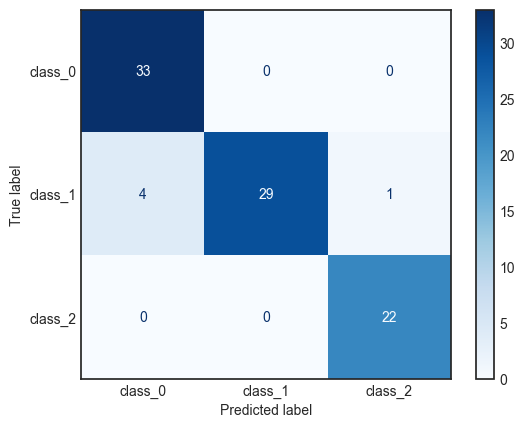

In [32]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# Predict the test set
y_pred_knn = grid_knn.predict(X_test) # Predict the test set using the best KNN model
print('KNN classification report:\n', classification_report(y_test, y_pred_knn)) # Print the classification report

cm = confusion_matrix(y_test, y_pred_knn) # Compute the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names) # Create a confusion matrix display
disp.plot(cmap='Blues') # Plot the confusion matrix

Logistic regression classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        22

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



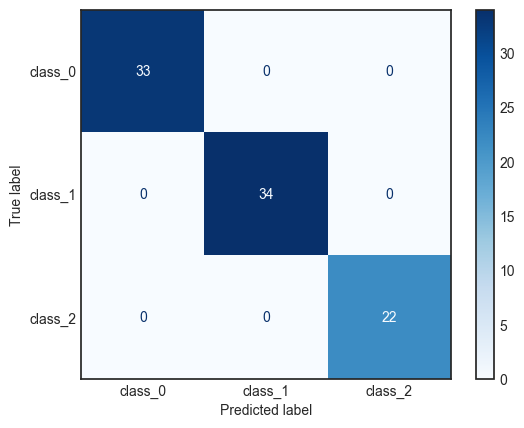

In [33]:
y_pred_log = grid_log.predict(X_test) # Predict the test set using the best logistic regression model
print('Logistic regression classification report:\n', classification_report(y_test, y_pred_log)) # Print the classification report

cm = confusion_matrix(y_test, y_pred_log) # Compute the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names) # Create a confusion matrix display
disp.plot(cmap='Blues') # Plot the confusion matrix